In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r1/title_r1_20k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 20000 drug-target pairs
encoding drug...
unique drugs: 18531
encoding protein...
unique target sequence: 1884
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 50.4977. Total time 0.0 hours
Validation at Epoch 1 with loss:2.63917, MSE: 2.23919 , Pearson Correlation: 0.22693 with p-value: 8.98E-25 , Concordance Index: 0.56348
Training at Epoch 2 iteration 0 with loss 2.17780. Total time 0.00666 hours
Validation at Epoch 2 with loss:2.00764, MSE: 2.16314 , Pearson Correlation: 0.33945 with p-value: 4.00E-55 , Concordance Index: 0.60172
Training at Epoch 3 iteration 0 with loss 2.08904. Total time 0.01305 hours
Validation at Epoch 3 with loss:2.21323, MSE: 2.06895 , Pearson Correlation: 0.34762 with p-value: 6.79E-58 , Concordance Index: 0.60515
Training at Epoch 4 iteration 0 with loss 2.45234. Total time 0.01972 hours
Validation at Epoch 4 with loss:2.19127, MSE: 2.00795 , Pearson Correlation: 0.37126 with p-value: 2.16E-66 , Concordance Index: 0.61113
Training at Epoch 5 iteration 0 with loss 2.01781. Total time 0.02611 hours
Validation

Training at Epoch 39 iteration 0 with loss 0.42375. Total time 0.24972 hours
Validation at Epoch 39 with loss:1.39436, MSE: 1.62910 , Pearson Correlation: 0.57482 with p-value: 2.90E-176 , Concordance Index: 0.69318
Training at Epoch 40 iteration 0 with loss 0.33523. Total time 0.25638 hours
Validation at Epoch 40 with loss:1.53628, MSE: 1.68302 , Pearson Correlation: 0.56585 with p-value: 1.14E-169 , Concordance Index: 0.68979
Training at Epoch 41 iteration 0 with loss 0.43373. Total time 0.26305 hours
Validation at Epoch 41 with loss:1.55844, MSE: 1.81913 , Pearson Correlation: 0.57344 with p-value: 3.12E-175 , Concordance Index: 0.69061
Training at Epoch 42 iteration 0 with loss 0.53801. Total time 0.26972 hours
Validation at Epoch 42 with loss:1.81066, MSE: 1.90838 , Pearson Correlation: 0.56930 with p-value: 3.47E-172 , Concordance Index: 0.69186
Training at Epoch 43 iteration 0 with loss 0.57156. Total time 0.27638 hours
Validation at Epoch 43 with loss:1.98465, MSE: 1.80085 , Pe

Training at Epoch 77 iteration 0 with loss 0.26556. Total time 0.5025 hours
Validation at Epoch 77 with loss:2.14136, MSE: 1.87127 , Pearson Correlation: 0.55532 with p-value: 3.40E-162 , Concordance Index: 0.68713
Training at Epoch 78 iteration 0 with loss 0.32929. Total time 0.50944 hours
Validation at Epoch 78 with loss:1.90786, MSE: 1.79120 , Pearson Correlation: 0.56451 with p-value: 1.05E-168 , Concordance Index: 0.68852
Training at Epoch 79 iteration 0 with loss 0.28146. Total time 0.51611 hours
Validation at Epoch 79 with loss:1.80143, MSE: 1.71118 , Pearson Correlation: 0.55994 with p-value: 1.93E-165 , Concordance Index: 0.68867
Training at Epoch 80 iteration 0 with loss 0.28302. Total time 0.52305 hours
Validation at Epoch 80 with loss:1.81692, MSE: 1.76686 , Pearson Correlation: 0.55141 with p-value: 1.75E-159 , Concordance Index: 0.68435
Training at Epoch 81 iteration 0 with loss 0.24712. Total time 0.52972 hours
Validation at Epoch 81 with loss:1.53387, MSE: 1.68222 , Pea

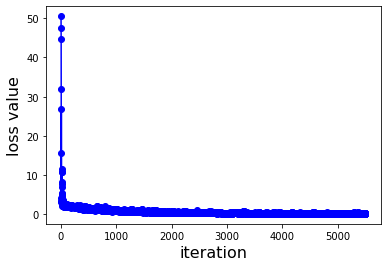

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r1/model_r1_20k_100epochs')